# Name - Saurabh Rajesh Pande
# Roll no - 2447006 , batch - A

### problem statement  - Implement Random Forest Classifier model to predict the safety of the car

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report

In [3]:
df = pd.read_csv('car_evaluation.csv')

In [4]:
df

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
...,...,...,...,...,...,...,...
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   vhigh    1727 non-null   object
 1   vhigh.1  1727 non-null   object
 2   2        1727 non-null   object
 3   2.1      1727 non-null   object
 4   small    1727 non-null   object
 5   low      1727 non-null   object
 6   unacc    1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [6]:
df.describe()


,vhigh,vhigh.1,2,2.1,small,low,unacc
count,1727,1727,1727,1727,1727,1727,1727
unique,4,4,4,3,3,3,4
top,high,high,3,4,med,med,unacc
freq,432,432,432,576,576,576,1209


In [7]:
for col in df.columns:
    print(f"Column {df[col].value_counts()} value count")
    print("\n")

Column high     432
med      432
low      432
vhigh    431
Name: vhigh, dtype: int64 value count


Column high     432
med      432
low      432
vhigh    431
Name: vhigh.1, dtype: int64 value count


Column 3        432
4        432
5more    432
2        431
Name: 2, dtype: int64 value count


Column 4       576
more    576
2       575
Name: 2.1, dtype: int64 value count


Column med      576
big      576
small    575
Name: small, dtype: int64 value count


Column med     576
high    576
low     575
Name: low, dtype: int64 value count


Column unacc    1209
acc       384
good       69
vgood      65
Name: unacc, dtype: int64 value count




In [8]:
le = LabelEncoder()
for col in df.columns:
    df[col] = le.fit_transform(df[col])

In [9]:
X = df.drop(columns=['unacc'])  # Features
y = df['unacc']  # Target (safety classification)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
#n_estimators = 100 means 100 decision trees 

RandomForestClassifier(random_state=42)

In [12]:
y_pred = clf.predict(X_test)

In [13]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 96.24%


In [17]:
print("Classification report")
print(classification_report(y_test,y_pred))

Classification report
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        77
           1       0.91      0.67      0.77        15
           2       0.99      1.00      0.99       237
           3       0.79      0.88      0.83        17

    accuracy                           0.96       346
   macro avg       0.91      0.87      0.88       346
weighted avg       0.96      0.96      0.96       346



In [14]:
feature_importance = clf.feature_importances_
feature_names = X.columns

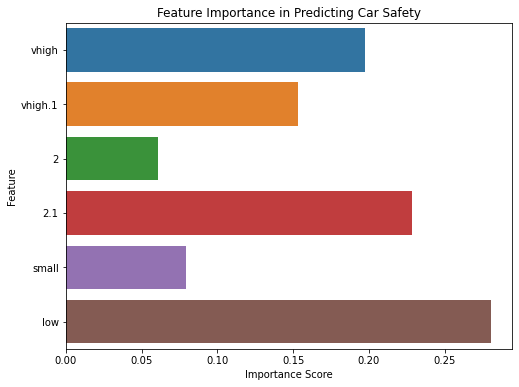

In [15]:
plt.figure(figsize=(8, 6))
sns.barplot(x=feature_importance, y=feature_names)
plt.title('Feature Importance in Predicting Car Safety')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score , classification_report
from sklearn.ensemble import RandomForestClassifier

In [4]:
df = pd.read_csv('car_evaluation.csv')

In [5]:
df

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
...,...,...,...,...,...,...,...
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good


In [7]:
df.describe()

,vhigh,vhigh.1,2,2.1,small,low,unacc
count,1727,1727,1727,1727,1727,1727,1727
unique,4,4,4,3,3,3,4
top,high,high,3,4,med,med,unacc
freq,432,432,432,576,576,576,1209


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   vhigh    1727 non-null   object
 1   vhigh.1  1727 non-null   object
 2   2        1727 non-null   object
 3   2.1      1727 non-null   object
 4   small    1727 non-null   object
 5   low      1727 non-null   object
 6   unacc    1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [9]:
df.shape

(1727, 7)

In [11]:
for col in df.columns:
    print(f'Column -> {df[col].value_counts()}value count')
    print('\n')

Column -> high     432
med      432
low      432
vhigh    431
Name: vhigh, dtype: int64value count


Column -> high     432
med      432
low      432
vhigh    431
Name: vhigh.1, dtype: int64value count


Column -> 3        432
4        432
5more    432
2        431
Name: 2, dtype: int64value count


Column -> 4       576
more    576
2       575
Name: 2.1, dtype: int64value count


Column -> med      576
big      576
small    575
Name: small, dtype: int64value count


Column -> med     576
high    576
low     575
Name: low, dtype: int64value count


Column -> unacc    1209
acc       384
good       69
vgood      65
Name: unacc, dtype: int64value count




In [16]:
le = LabelEncoder()
for col in df.columns:
    df[col] = le.fit_transform(df[col])

In [20]:
x = df.drop(columns=['unacc']) # features 
y = df['unacc']

In [21]:
x

,vhigh,vhigh.1,2,2.1,small,low
0,3,3,0,0,2,2
1,3,3,0,0,2,0
2,3,3,0,0,1,1
3,3,3,0,0,1,2
4,3,3,0,0,1,0
...,...,...,...,...,...,...
1722,1,1,3,2,1,2
1723,1,1,3,2,1,0
1724,1,1,3,2,0,1
1725,1,1,3,2,0,2


In [22]:
y

0       2
1       2
2       2
3       2
4       2
       ..
1722    1
1723    3
1724    2
1725    1
1726    3
Name: unacc, Length: 1727, dtype: int32

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2 , random_state = 42)

In [26]:
clf_ran  = RandomForestClassifier(n_estimators = 100 , random_state = 42)

In [28]:
clf_ran.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [29]:
Y_pred = clf_ran.predict(x_test)

In [30]:
acc = accuracy_score(y_test,Y_pred)
print(f'accuracy is -> {acc*100:.2f}%')

accuracy is -> 96.24%


In [31]:
print('classification report')
print(classification_report(y_test,Y_pred))

classification report
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        77
           1       0.91      0.67      0.77        15
           2       0.99      1.00      0.99       237
           3       0.79      0.88      0.83        17

    accuracy                           0.96       346
   macro avg       0.91      0.87      0.88       346
weighted avg       0.96      0.96      0.96       346



In [34]:
feature_imp = clf_ran.feature_importances_
features_name = x.columns

In [39]:
features_name

Index(['vhigh', 'vhigh.1', '2', '2.1', 'small', 'low'], dtype='object')

In [41]:
import seaborn as sns

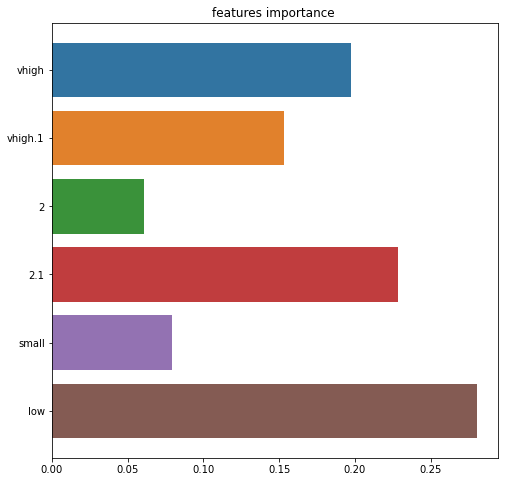

In [43]:
plt.figure(figsize=(8,8))
sns.barplot(x = feature_imp , y = features_name)
plt.title('features importance ')
plt.plot()
plt.show()

